In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('london-outcomes.csv', encoding='windows-1252')

In [3]:
data.shape

(1947050, 10)

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

In [6]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,b4adcc899360d595450a35cbe4d7d71d295bafefef98b2...,2014-06,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
1,64b14e3efdf9e12425e3ac19f5e72b6d19b5656523d91b...,2014-06,City of London Police,City of London Police,-0.088843,51.509532,On or near Parking Area,E01032739,City of London 001F,Investigation complete; no suspect identified
2,d9909143deda1db75d8ba35b701f31b268d9273764ad42...,2014-06,City of London Police,City of London Police,-0.084701,51.509320,On or near LOWER THAMES STREET,E01032739,City of London 001F,Investigation complete; no suspect identified
3,bd44c99de1bdc727abc7c682bf3916969a3bc673e93093...,2014-06,City of London Police,City of London Police,-0.079080,51.519615,On or near BISHOPSGATE,E01004307,Tower Hamlets 015B,Formal action is not in the public interest
4,f8e3fc7e63baa91ddd6625dd1f4f48203f565fd021d9d4...,2014-06,City of London Police,City of London Police,-0.104281,51.516032,On or near BEAR ALLEY,E01032740,City of London 001G,Investigation complete; no suspect identified


In [7]:
data.dtypes

In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1947050


In [9]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Longitude. Тип данных float64. Количество пустых значений 31940, 1.64%.
Колонка Latitude. Тип данных float64. Количество пустых значений 31940, 1.64%.


In [10]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LSOA code. Тип данных object. Количество пустых значений 31940, 1.64%.
Колонка LSOA name. Тип данных object. Количество пустых значений 31940, 1.64%.


In [11]:
data_num = data[num_cols]
data_num

,Longitude,Latitude
0,NaN,NaN
1,-0.088843,51.509532
2,-0.084701,51.509320
3,-0.079080,51.519615
4,-0.104281,51.516032
...,...,...
1947045,-0.242173,51.446627
1947046,-0.156772,51.442455
1947047,-0.150844,51.474510
1947048,-0.174952,51.467217


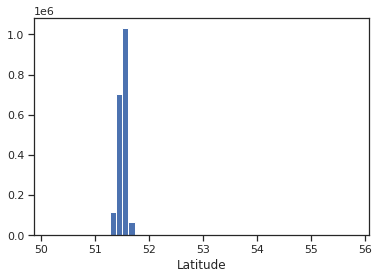

In [12]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [13]:
data_num_Longitude = data_num[['Longitude']]
data_num_Longitude.head()

,Longitude
0,NaN
1,-0.088843
2,-0.084701
3,-0.079080
4,-0.104281


In [14]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Longitude)
mask_missing_values_only

In [15]:
strategies=['mean']

In [16]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Longitude)
    return data_num_imp[mask_missing_values_only]

In [17]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([-0.11944962, -0.11944962, -0.11944962, ..., -0.11944962,
        -0.11944962, -0.11944962]))

In [19]:
data_num_Latitude = data_num[['Latitude']]
data_num_Latitude.head()

,Latitude
0,NaN
1,51.509532
2,51.509320
3,51.519615
4,51.516032


In [20]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Latitude)
mask_missing_values_only

In [21]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Latitude)
    return data_num_imp[mask_missing_values_only]

In [22]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([51.50953352, 51.50953352, 51.50953352, ..., 51.50953352,
        51.50953352, 51.50953352]))

In [23]:
# проверим есть ли пропущенные значения
data.isnull().sum()

In [24]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LSOA code. Тип данных object. Количество пустых значений 31940, 1.64%.
Колонка LSOA name. Тип данных object. Количество пустых значений 31940, 1.64%.


In [25]:
cat_temp_data = data[['LSOA code']]
cat_temp_data.head()

,LSOA code
0,NaN
1,E01032739
2,E01032739
3,E01004307
4,E01032740


In [26]:
cat_temp_data['LSOA code'].unique()

In [27]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [28]:
# Пустые значения отсутствуют
np.unique(data_imp2)

In [30]:
cat_temp_data2 = data[['LSOA name']]
cat_temp_data2.head()

,LSOA name
0,NaN
1,City of London 001F
2,City of London 001F
3,Tower Hamlets 015B
4,City of London 001G


In [31]:
cat_temp_data2['LSOA name'].unique()

In [32]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data2)
data_imp3

In [33]:
np.unique(data_imp3)

In [34]:
cat_temp_data = data[['LSOA name']]
cat_temp_data.head()

,LSOA name
0,NaN
1,City of London 001F
2,City of London 001F
3,Tower Hamlets 015B
4,City of London 001G


In [35]:
cat_temp_data['LSOA name'].unique()

In [37]:
cat_enc = pd.DataFrame({'LSOA code':data_imp2.T[0]})
cat_enc

,LSOA code
0,E01033595
1,E01032739
2,E01032739
3,E01004307
4,E01032740
...,...
1947045,E01004570
1947046,E01004545
1947047,E01004563
1947048,E01004535


In [41]:
data_oe = data[['LSOA code']]
data_oe.head()

,LSOA code
0,NaN
1,E01032739
2,E01032739
3,E01004307
4,E01032740


In [42]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

In [44]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

In [45]:
np.unique(cat_enc_oe[:, 0])

In [46]:
oe.categories_

[array(['E01000001', 'E01000002', 'E01000003', ..., 'W01000965',
        'W01001762', 'W01001768'], dtype=object)]

In [59]:
cat_enc = pd.DataFrame({'LSOA name':data_imp3.T[0]})
cat_enc

,LSOA name
0,NA
1,City of London 001F
2,City of London 001F
3,Tower Hamlets 015B
4,City of London 001G
...,...
1947045,Wandsworth 023B
1947046,Wandsworth 027B
1947047,Wandsworth 002C
1947048,Wandsworth 007A


In [60]:
cat_enc['LSOA name'].unique()

In [62]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['LSOA name'])

In [63]:
cat_enc_le

In [64]:
np.unique(cat_enc_le)

In [71]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Latitude']])

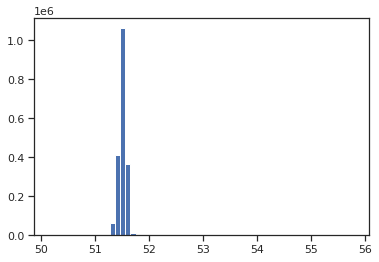

In [78]:
plt.hist(data['Latitude'], 60)
plt.show()

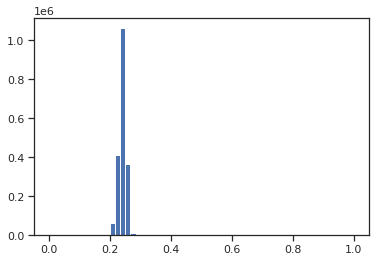

In [77]:
plt.hist(sc1_data, 60)
plt.show()

In [79]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Latitude']])

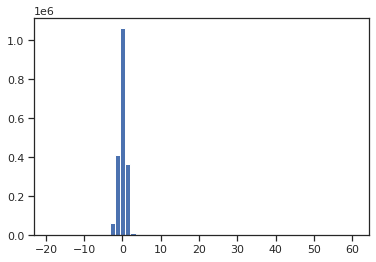

In [81]:
plt.hist(sc2_data, 60)
plt.show()